In [50]:
import heapq

import mglearn as mglearn
import np as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import sklearn_evaluation
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import cross_val_score

!pip install numpy scipy scikit-learn matplotlib pandas
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import metrics
import heapq


You should consider upgrading via the '/Users/engineer/workspace/cse590-machine-learning/venv/bin/python -m pip install --upgrade pip' command.


class example

In [3]:
X_train = pd.read_csv("./IMDB dataset/X_train.csv").values
y_train = pd.read_csv("./IMDB dataset/y_train.csv").values.ravel()
X_test = pd.read_csv("./IMDB dataset/X_test.csv").values
y_test = pd.read_csv("./IMDB dataset/y_test.csv").values.ravel()

# Gradient Boost Random Tree GBRT

general functions

In [19]:
def cross_validate_gradient(
        n_estimators,
        learning_rates,
        max_depths
):
    parameters = {
        'n_estimators': n_estimators,
        'learning_rate': learning_rates,
        'max_depth': max_depths,
    }
    classifier = GradientBoostingClassifier(
        random_state=0,
    )
    grid_search = GridSearchCV(
        classifier,
        parameters, cv=4,
        return_train_score=True
    )
    grid_search.fit(X_train, y_train)

    print_grid_search_results(grid_search, parameters)
    return grid_search


def print_grid_search_results(grid_search, parameters):
    for parameter in parameters:
        print(f'Best {parameter}:', grid_search.best_params_[parameter])
    print("Train score: ", grid_search.cv_results_['mean_train_score'])
    print("Test score: ", grid_search.cv_results_['mean_test_score'])



def graph_grid_search_random_forest(grid_search):
    plt.title("GBRT")
    plt.xlabel("learning_rate")
    plt.ylabel("n_estimators")

    sklearn_evaluation.evaluator.plot.grid_search(
        grid_search.cv_results_,
        change=( "n_estimators", "learning_rate")
    )

    plt.legend()
    plt.show()

In [4]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
%time gbrt.fit(X_train, y_train)

print("Accuracy on training: {:3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test: {:3f}".format(gbrt.score(X_test, y_test)))

CPU times: user 30.5 s, sys: 495 ms, total: 31 s
Wall time: 31.2 s
Accuracy on training: 0.823673
Accuracy on test: 0.812953


In [14]:
gbrt = GradientBoostingClassifier(
    n_estimators=10,
    learning_rate=0.1,
    max_depth=2
)
%time gbrt.fit(X_train, y_train)

print("Train score: {:3f}".format(gbrt.score(X_train, y_train)))
print("Test score: {:3f}".format(gbrt.score(X_test, y_test)))

CPU times: user 2.06 s, sys: 44.6 ms, total: 2.11 s
Wall time: 2.14 s
Train score: 0.689228
Test score: 0.692308


trial 1

In [28]:
n_estimators = [100, 200, 300]
max_depths = [1, 2, 3]
learning_rates = [0.01]

gbrt_t1 = %time cross_validate_gradient( n_estimators, learning_rates, max_depths )


KeyboardInterrupt: 

In [23]:
print("Train score: {:3f}".format(gbrt_t1.score(X_train, y_train)))
print("Test score: {:3f}".format(gbrt_t1.score(X_test, y_test)))

Train score: 0.821153
Test score: 0.795512


In [27]:

gbrt = GradientBoostingClassifier(
    random_state=0,
    learning_rate=0.001,
    max_depth=1,
    n_estimators=100
)
%time gbrt.fit(X_train, y_train)

print("Accuracy on training: {:3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test: {:3f}".format(gbrt.score(X_test, y_test)))

CPU times: user 9.58 s, sys: 353 ms, total: 9.93 s
Wall time: 9.97 s
Accuracy on training: 0.616185
Accuracy on test: 0.618065


In [38]:
# n_estimators = np.linspace(90, 100, 2, dtype=int)
n_estimators = [100]
learning_rates = [0.1, 0.5, 0.9]
max_depths = [3, 4, 5]

% time cross_validate_gradient(n_estimators, learning_rates, max_depths)

KeyboardInterrupt: 

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
n_estimators = [10, 20, 30]
learning_rates = np.linspace(0, 1, 10)
max_depths = np.linspace(1, 10, 5)
grid_search_gbrt = % time cross_validate_gradient(n_estimators, learning_rates, max_depths)

In [42]:
print("hi")

hi


Fit Analysis

In [31]:
optimal_gbrt = GradientBoostingClassifier(
    random_state=0,
    learning_rate=0.99,
    max_depth=5,
    n_estimators=100
)
%time optimal_gbrt.fit(X_train, y_train)


print("Train score: {:3f}".format(optimal_gbrt.score(X_train, y_train)))
print("Test score: {:3f}".format(optimal_gbrt.score(X_test, y_test)))

CPU times: user 54.1 s, sys: 233 ms, total: 54.3 s
Wall time: 54.6 s
Train score: 0.977559
Test score: 0.823953


## Feature Importance

In [29]:
def plot_feature_importances(model):
    n_features = X_train.data.shape[1]
    plt.barh(
        range(n_features),
        model.feature_importances_,
        align='center'
    )
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")

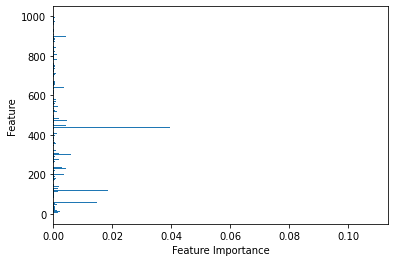

In [32]:
plot_feature_importances(optimal_gbrt)

In [45]:
y_predictions = optimal_gbrt.predict(X_test)

misclassified_indices = np.where((y_predictions != y_test))[0]
print(len(misclassified_indices))

4401


knn

In [47]:
pd.set_option('display.max_rows', None)
k = 3
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X_train)
distances, indices = nn.kneighbors(X_test[misclassified_indices])

print(y_test[misclassified_indices[0]])
columns = ["Misclassified Test idx", "True Class", "Pred Class"]
for i in range(3):
    columns += ["Neigbor#{}_idx".format(i + 1), "Neigbor#{}_True Class".format(i + 1),
        "Neigbor#{}_Distance".format(i + 1)]

df = pd.DataFrame(columns=columns)

df["Misclassified Test idx"] = misclassified_indices
df["True Class"] = y_test[misclassified_indices]
df["Pred Class"] = y_predictions[misclassified_indices]
for i in range(3):
    df["Neigbor#{}_idx".format(i + 1)] = indices[:, i]
    df["Neigbor#{}_True Class".format(i + 1)] = y_train[indices[:, i]]
    df["Neigbor#{}_Distance".format(i + 1)] = np.around(distances[:, i], decimals=2)

df

0.0


,Misclassified Test idx,True Class,Pred Class,Neigbor#1_idx,Neigbor#1_True Class,Neigbor#1_Distance,Neigbor#2_idx,Neigbor#2_True Class,Neigbor#2_Distance,Neigbor#3_idx,Neigbor#3_True Class,Neigbor#3_Distance
0,2,0.0,1.0,5459,0.0,9.22,2176,1.0,9.27,10811,1.0,9.27
1,7,0.0,1.0,418,1.0,7.28,24990,1.0,7.35,4695,0.0,7.42
2,16,0.0,1.0,922,1.0,8.43,6225,1.0,8.43,23019,0.0,8.43
3,25,0.0,1.0,9989,1.0,9.59,690,1.0,9.75,8003,1.0,9.75
4,30,1.0,0.0,15201,1.0,7.55,6236,1.0,7.62,8183,1.0,7.62
5,31,0.0,1.0,6161,1.0,7.81,19892,0.0,7.81,2176,1.0,7.94
6,50,0.0,1.0,11520,1.0,7.14,11001,1.0,7.35,9470,1.0,7.42
7,52,1.0,0.0,22668,1.0,7.07,4695,0.0,7.14,14169,1.0,7.21
8,54,1.0,0.0,6944,1.0,9.11,18056,0.0,9.11,1820,1.0,9.22
9,58,0.0,1.0,3353,0.0,7.07,3589,0.0,7.28,6451,1.0,7.28


In [51]:
top_10_feature_importances = heapq.nlargest(10, optimal_gbrt.feature_importances_)
top_10_importances_indices = []
for item in top_10_feature_importances:
    correct_actual_item_index = np.argwhere(optimal_gbrt.feature_importances_ == item)
    top_10_importances_indices.append(correct_actual_item_index[0][0])

In [52]:
item_misclassed = X_test[249]
item_neighbor = X_test[7101]
item_misclassed_top = []
item_neighbor_top = []

top_10_importances_indices.sort()
for i in top_10_importances_indices:
    item_misclassed_top.append(
        item_misclassed[i]
    )


for i in top_10_importances_indices:
    item_neighbor_top.append(
        item_neighbor[i]
    )
print(top_10_importances_indices)
print(item_misclassed_top)
print(item_neighbor_top)

[57, 78, 87, 118, 164, 249, 321, 357, 373, 437]
[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
